<a href="https://colab.research.google.com/github/ridwan2003039/test/blob/main/Electricity_generation_and_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset (update file path as needed)
file_path = '/content/Electricity production and consumption percentage in Bangladesh.xlsx'
sheet_name = 'Electricity production and cons'
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Identify numeric columns for imputation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data for KNN Imputer
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform imputation
imputed_data = knn_imputer.fit_transform(scaled_data)

# Reverse scaling to original values
imputed_data = scaler.inverse_transform(imputed_data)

# Replace original numeric columns with imputed data
numeric_data_imputed = pd.DataFrame(imputed_data, columns=numeric_data.columns)
data[numeric_data.columns] = numeric_data_imputed

# Save the imputed dataset to a new Excel file
output_file_path = 'imputed_data.xlsx'
data.to_excel(output_file_path, index=False)

print(f"Imputed data saved to {output_file_path}")


Imputed data saved to imputed_data.xlsx


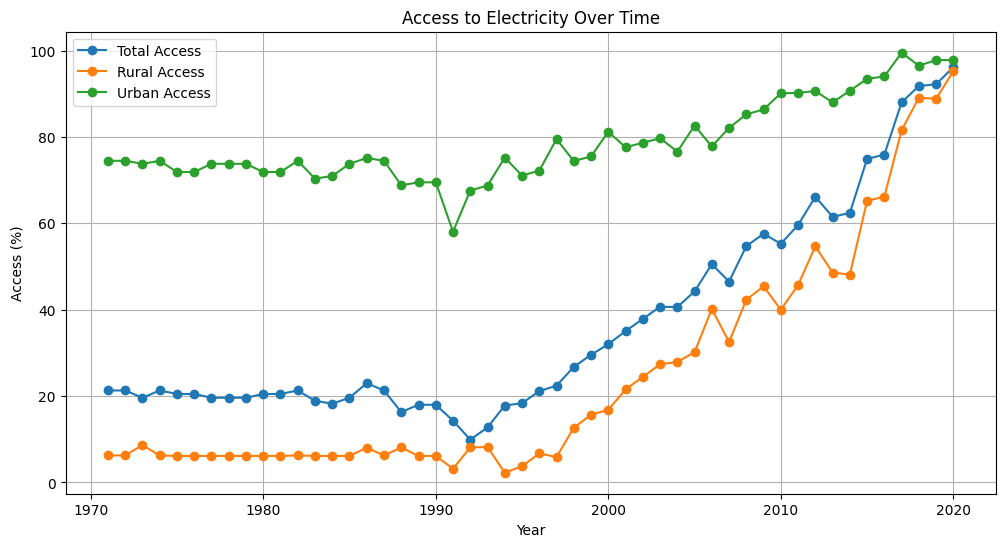

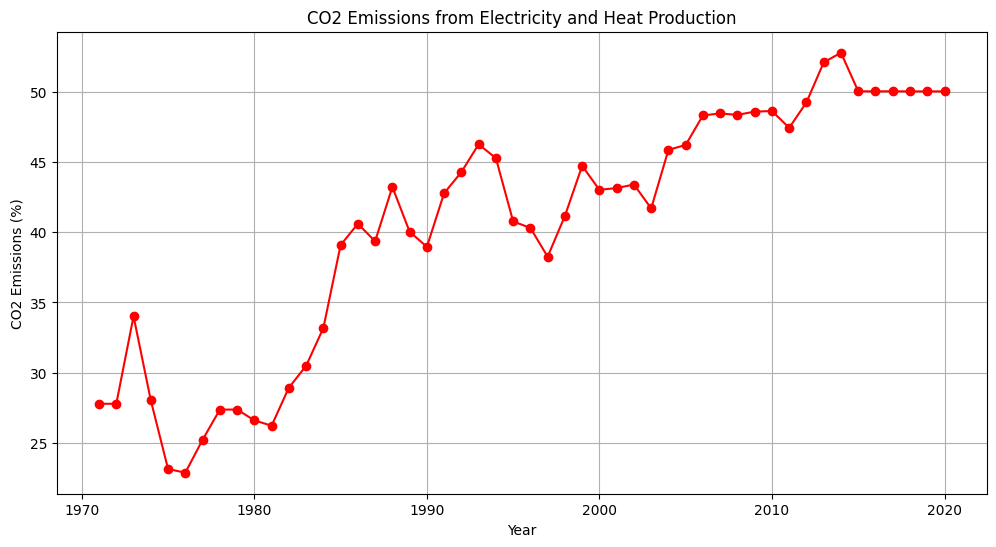

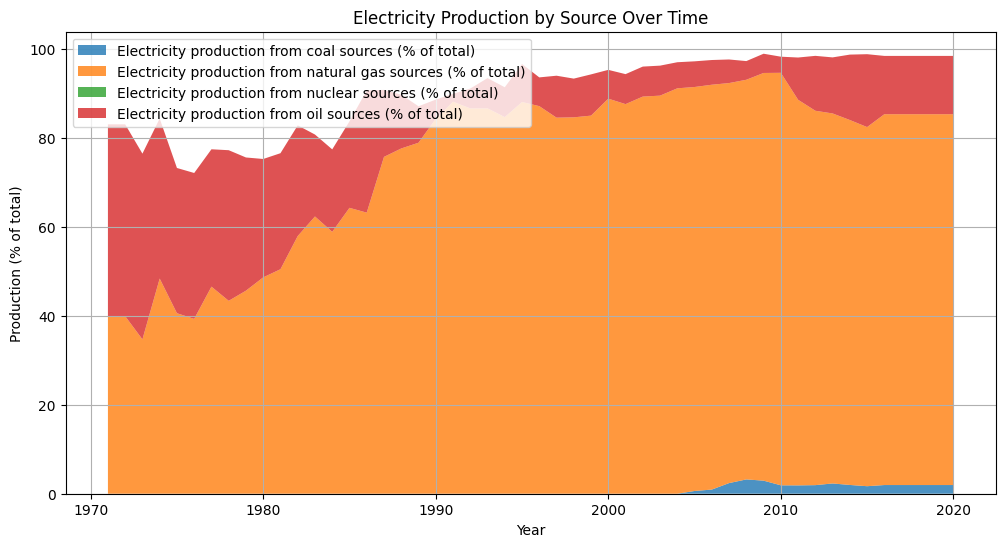

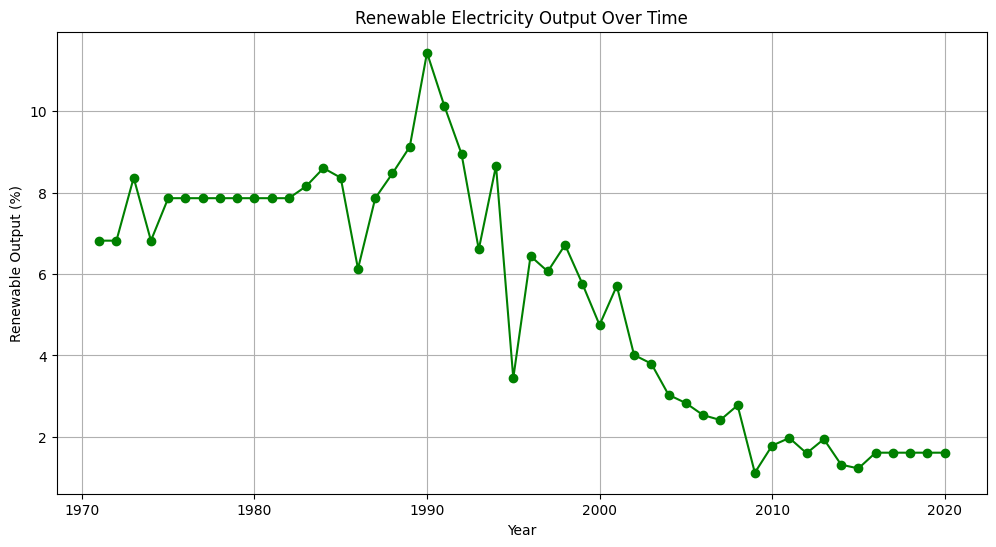

In [5]:
# Plot 1: Access to electricity over time (overall, rural, and urban)
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Access to electricity (% of population)'], label='Total Access', marker='o')
plt.plot(data['Year'], data['Access to electricity, rural (% of rural population)'], label='Rural Access', marker='o')
plt.plot(data['Year'], data['Access to electricity, urban (% of urban population)'], label='Urban Access', marker='o')
plt.title('Access to Electricity Over Time')
plt.xlabel('Year')
plt.ylabel('Access (%)')
plt.legend()
plt.grid()
plt.show()

# Plot 2: CO2 emissions from electricity and heat production over time
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['CO2 emissions from electricity and heat production, total (% of total fuel combustion)'],
         label='CO2 Emissions', marker='o', color='red')
plt.title('CO2 Emissions from Electricity and Heat Production')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (%)')
plt.grid()
plt.show()

# Plot 3: Electricity production by source (stacked area plot)
sources = [
    'Electricity production from coal sources (% of total)',
    'Electricity production from natural gas sources (% of total)',
    'Electricity production from nuclear sources (% of total)',
    'Electricity production from oil sources (% of total)'
]
production_data = data[sources].fillna(0)
production_data.index = data['Year']

plt.figure(figsize=(12, 6))
plt.stackplot(production_data.index, production_data.T, labels=sources, alpha=0.8)
plt.title('Electricity Production by Source Over Time')
plt.xlabel('Year')
plt.ylabel('Production (% of total)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plot 4: Renewable electricity output over time
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Renewable electricity output (% of total electricity output)'],
         label='Renewable Electricity Output', marker='o', color='green')
plt.title('Renewable Electricity Output Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Output (%)')
plt.grid()
plt.show()

# Optional: Save the plots
# plt.savefig('output_plot.png')  # Uncomment to save a plot


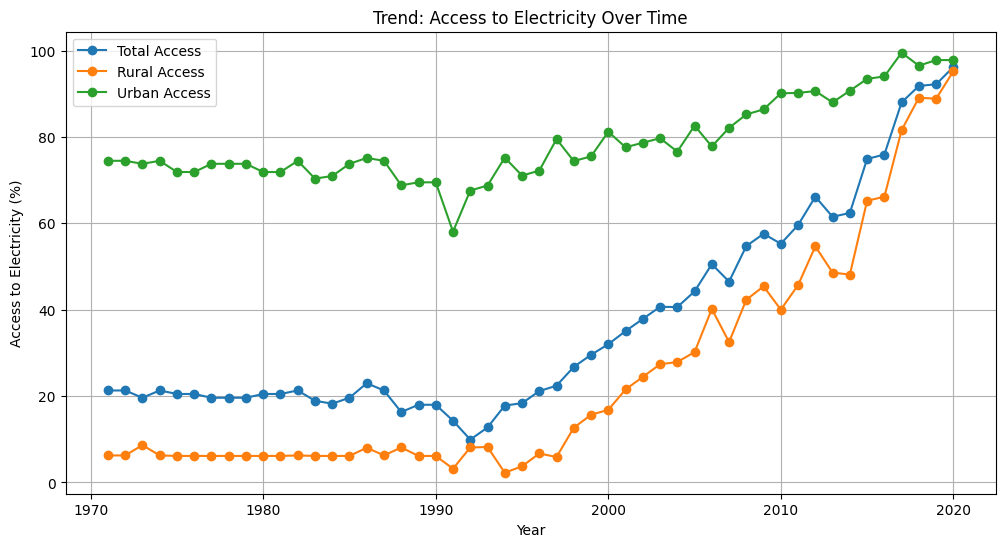

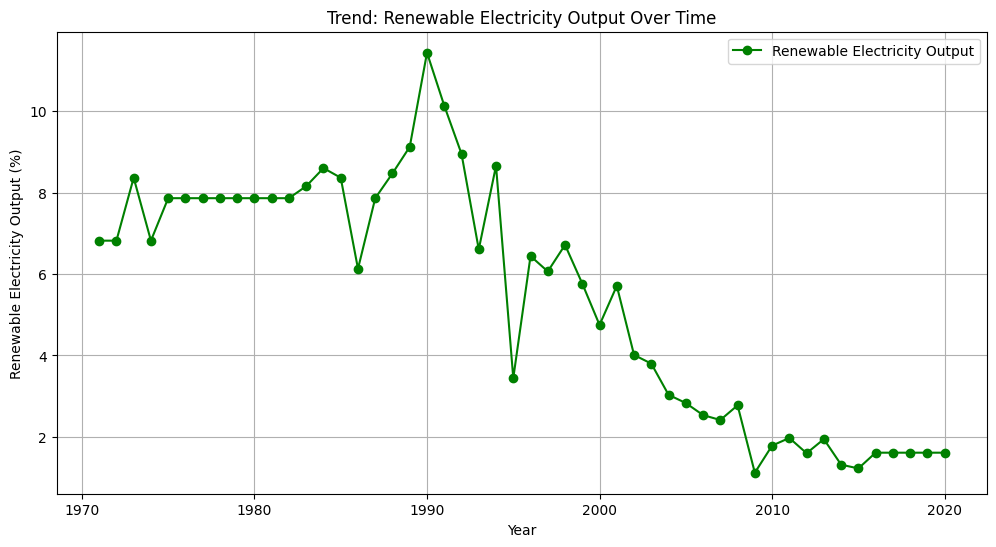

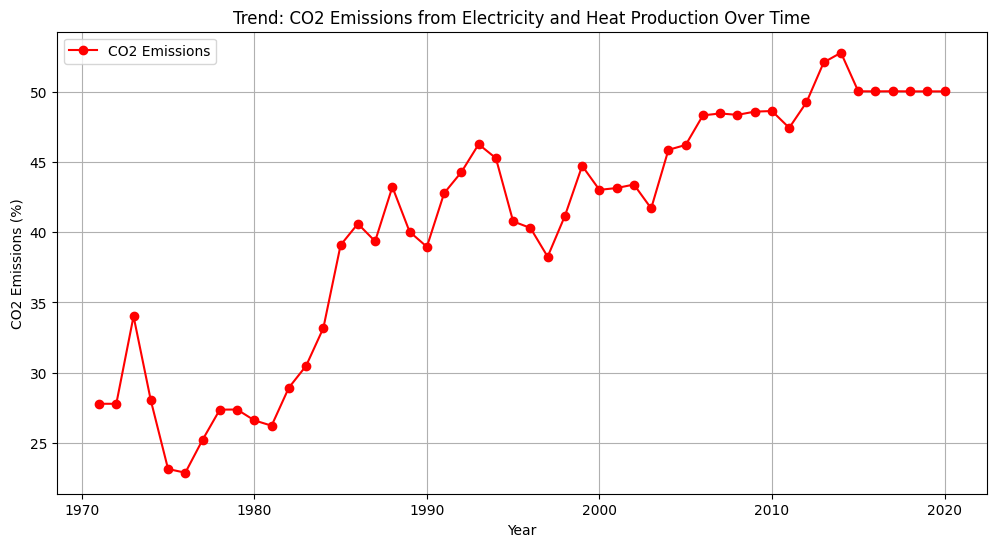

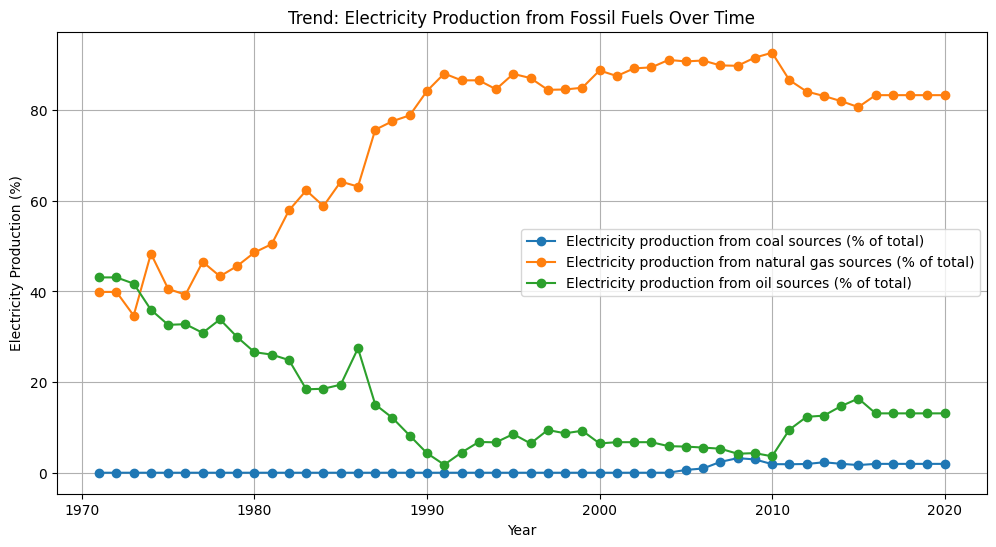

In [3]:
# Trend 1: Electricity access (overall, rural, urban) over time
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Access to electricity (% of population)'], label='Total Access', marker='o')
plt.plot(data['Year'], data['Access to electricity, rural (% of rural population)'], label='Rural Access', marker='o')
plt.plot(data['Year'], data['Access to electricity, urban (% of urban population)'], label='Urban Access', marker='o')
plt.title('Trend: Access to Electricity Over Time')
plt.xlabel('Year')
plt.ylabel('Access to Electricity (%)')
plt.legend()
plt.grid()
plt.show()

# Trend 2: Renewable electricity output over time
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Renewable electricity output (% of total electricity output)'],
         label='Renewable Electricity Output', marker='o', color='green')
plt.title('Trend: Renewable Electricity Output Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity Output (%)')
plt.legend()
plt.grid()
plt.show()

# Trend 3: CO2 emissions over time
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['CO2 emissions from electricity and heat production, total (% of total fuel combustion)'],
         label='CO2 Emissions', marker='o', color='red')
plt.title('Trend: CO2 Emissions from Electricity and Heat Production Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (%)')
plt.legend()
plt.grid()
plt.show()

# Trend 4: Electricity production from fossil fuels (coal, gas, oil) over time
sources = [
    'Electricity production from coal sources (% of total)',
    'Electricity production from natural gas sources (% of total)',
    'Electricity production from oil sources (% of total)'
]
plt.figure(figsize=(12, 6))
for source in sources:
    plt.plot(data['Year'], data[source], label=source, marker='o')
plt.title('Trend: Electricity Production from Fossil Fuels Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Production (%)')
plt.legend()
plt.grid()
plt.show()


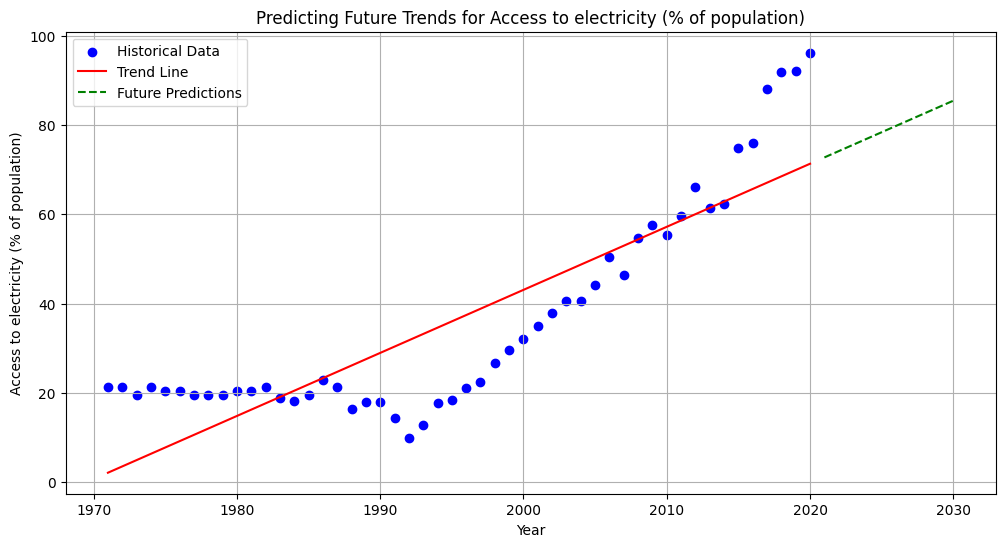

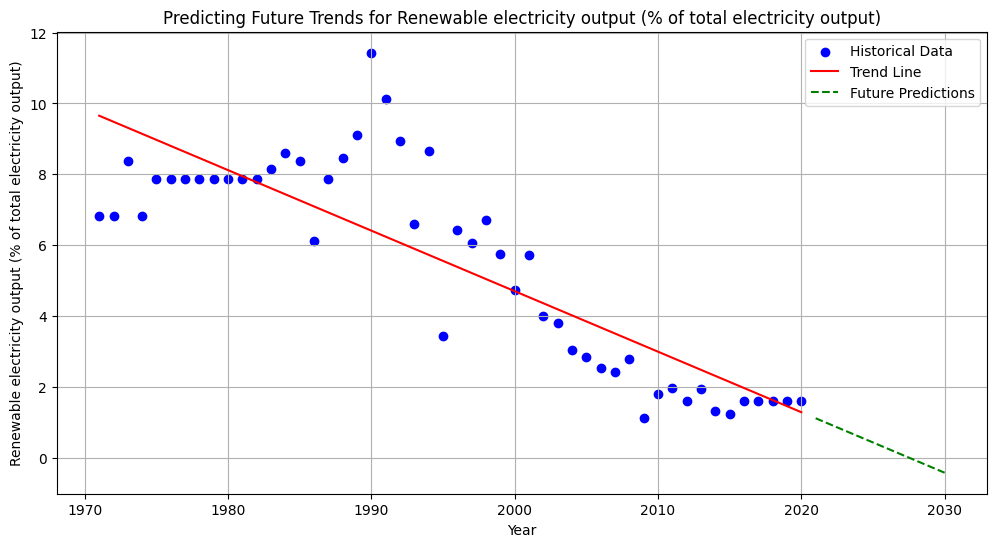

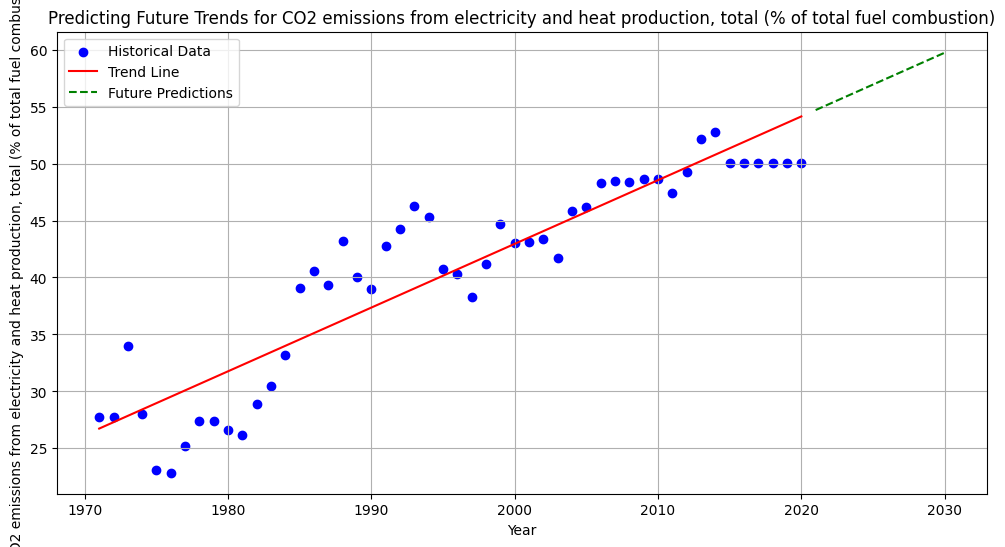

Future predictions saved to future_predictions.xlsx


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Function to predict future values using Linear Regression
def predict_future(data, column, future_years=10):
    # Prepare the data
    X = data['Year'].values.reshape(-1, 1)  # Feature: Year
    y = data[column].values  # Target: The column to predict

    # Remove rows with NaN values
    X = X[~np.isnan(y)]
    y = y[~np.isnan(y)]

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate future years
    last_year = data['Year'].max()
    future_X = np.arange(last_year + 1, last_year + 1 + future_years).reshape(-1, 1)

    # Predict future values
    future_predictions = model.predict(future_X)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, label='Historical Data', color='blue')
    plt.plot(X, model.predict(X), label='Trend Line', color='red')
    plt.plot(future_X, future_predictions, label='Future Predictions', color='green', linestyle='dashed')
    plt.title(f'Predicting Future Trends for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Combine historical and predicted data
    future_years_df = pd.DataFrame({'Year': future_X.flatten(), column: future_predictions})
    return future_years_df

# Predict and plot for electricity access (total)
electricity_access_predictions = predict_future(data, 'Access to electricity (% of population)', future_years=10)

# Predict and plot for renewable electricity output
renewable_output_predictions = predict_future(data, 'Renewable electricity output (% of total electricity output)', future_years=10)

# Predict and plot for CO2 emissions
co2_emissions_predictions = predict_future(data, 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', future_years=10)

# Combine predictions into a single DataFrame
future_predictions = electricity_access_predictions.merge(
    renewable_output_predictions, on='Year', how='outer'
).merge(co2_emissions_predictions, on='Year', how='outer')

# Save future predictions to an Excel file
output_file_path = 'future_predictions.xlsx'
future_predictions.to_excel(output_file_path, index=False)

print(f"Future predictions saved to {output_file_path}")
